In [1]:
import pandas as pd
import numpy as np

In [ ]:
stores = pd.read_csv('/stores.csv')

In [ ]:
stores.head(3)

Filtering


In [ ]:
# To apply conditions we use .Loc[,]
# Conditions must be applied on rows
stores.loc[(stores.Location=='Delhi'),]

,StoreCode,StoreName,2StoreType,Location 2,Location,OperatingCost,Staff_Cnt,TotalSales,Total Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,Online-Presence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Mumbai,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
5,STR106,Apparel Zone,Apparel,Delhi,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
6,STR107,Fashion Bazar,Apparel,Delhi,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4
7,STR108,Digital Bazar,Electronincs,Delhi,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2


In [ ]:
stores.loc[(stores.TotalSales > 100) & (stores.TotalSales < 200),]

,StoreCode,StoreName,2StoreType,Location 2,Location,OperatingCost,Staff_Cnt,TotalSales,Total Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,Online-Presence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Mumbai,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
7,STR108,Digital Bazar,Electronincs,Delhi,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
8,STR109,Electronics Zone,Electronincs,Chennai,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,STR110,Apparel Zone,Apparel,Mumbai,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4
10,STR111,Super Bazar,Super Market,Chennai,Chennai,17.8,60,167.6,123,3.92,3.440,18.90,1,0,4,4
20,STR121,Central Store,Super Market,Mumbai,Mumbai,21.5,40,120.1,97,3.70,2.465,20.01,1,0,3,1
26,STR127,Super Bazar,Super Market,Kolkata,Kolkata,26.0,40,120.3,91,4.43,2.140,16.70,0,1,5,2
29,STR130,Apparel Zone,Apparel,Kolkata,Kolkata,19.7,60,145.0,175,3.62,2.770,15.50,0,1,5,4


In [ ]:
stores.loc[(stores.TotalSales > 100) & (stores.TotalSales < 200),].reset_index(drop=True)  # Row no. will be reset
                                                                    

,StoreCode,StoreName,2StoreType,Location 2,Location,OperatingCost,Staff_Cnt,TotalSales,Total Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,Online-Presence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Mumbai,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR108,Digital Bazar,Electronincs,Delhi,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
4,STR109,Electronics Zone,Electronincs,Chennai,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
5,STR110,Apparel Zone,Apparel,Mumbai,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4
6,STR111,Super Bazar,Super Market,Chennai,Chennai,17.8,60,167.6,123,3.92,3.440,18.90,1,0,4,4
7,STR121,Central Store,Super Market,Mumbai,Mumbai,21.5,40,120.1,97,3.70,2.465,20.01,1,0,3,1
8,STR127,Super Bazar,Super Market,Kolkata,Kolkata,26.0,40,120.3,91,4.43,2.140,16.70,0,1,5,2
9,STR130,Apparel Zone,Apparel,Kolkata,Kolkata,19.7,60,145.0,175,3.62,2.770,15.50,0,1,5,4


Conditions + Assignments

In [ ]:
# np.where(cond,valt,valf)
np.where(stores.OwnStore == 0, 'Rented','Own')
stores['OwnershipType'] = np.where(stores.OwnStore == 0, 'Rented','Own')


In [ ]:
stores.head(3)

In [ ]:
# If staffcount is < 50, then replace that with 50
np.where(stores.Staff_Cnt < 50, 50,stores.Staff_Cnt)

Sorting

In [ ]:
# Sort the data by one column in asc
sort1 = stores.sort_values(by=['Location'],ascending=True).reset_index(drop=True)
# Sort the data by one column in desc
sort2 = stores.sort_values(by=['TotalSales'],ascending=False).reset_index(drop=True)

# Sort the data by two columns, one group, other is value and both in asc
sort3 = stores.sort_values(by=['Location','TotalSales'],ascending=True).reset_index(drop=True)

# Sort the data by two columns, one group, other is value and both in desc
sort4 = stores.sort_values(by=['Location','TotalSales'],ascending=False).reset_index(drop=True)

# Sort the data by two columns, one group, other is value and one is in asc and other is in desc
sort5 = stores.sort_values(by=['Location','TotalSales'],ascending=[True,False]).reset_index(drop=True)


In [ ]:
sort5

In [ ]:
# Deep copy  stores_backup = stores.copy(Deep=TRUE) Two different objects
# Shallow copy = Just by reference = referening to the same memory example = stores_backup = stores. Changes get reflected in both the dataframes , Same memory location just different names
stores_backup = stores.copy()

In [ ]:
# Missing Values
# A cell is blank/ a null value
# With which values can substitue missing values? 
# A missing value is denoted by NaN

In [ ]:
# We substitute NaN by :
# 1. By default value by 0 or na
# 2. By mean - if your data is symmetric
# 3. By median - for all the cases
# 4. By mode - if the data is categorical
# 5. Delete the rows with missing value - when the data is big enough
# 6. Use ML : Use OLS Regression, DT, RF, KNN


In [ ]:
# How to substitute 
# ser.fillna()
# df.column.fillna()
stores.count()

StoreCode          32
StoreName          32
2StoreType         32
Location 2         32
Location           32
OperatingCost      32
Staff_Cnt          32
TotalSales         32
Total Customers    32
AcqCostPercust     29
BasketSize         32
ProfitPercust      32
OwnStore           32
Online-Presence    32
Tenure             32
StoreSegment       32
OwnershipType      32
dtype: int64

In [ ]:
acq = stores.AcqCostPercust 

In [ ]:
acq

0     3.90
1     3.90
2     3.85
3     3.08
4     3.15
5     2.76
6     3.21
7     3.69
8     3.92
9     3.92
10    3.92
11     NaN
12     NaN
13     NaN
14    2.93
15    3.00
16    3.23
17    4.08
18    4.93
19    4.22
20    3.70
21    2.76
22    3.15
23    3.73
24    3.08
25    4.08
26    4.43
27    3.77
28    4.22
29    3.62
30    3.54
31    4.11
Name: AcqCostPercust, dtype: float64

In [ ]:
acq.fillna(666)

0       3.90
1       3.90
2       3.85
3       3.08
4       3.15
5       2.76
6       3.21
7       3.69
8       3.92
9       3.92
10      3.92
11    666.00
12    666.00
13    666.00
14      2.93
15      3.00
16      3.23
17      4.08
18      4.93
19      4.22
20      3.70
21      2.76
22      3.15
23      3.73
24      3.08
25      4.08
26      4.43
27      3.77
28      4.22
29      3.62
30      3.54
31      4.11
Name: AcqCostPercust, dtype: float64

In [ ]:
acq.fillna(acq.mean())

0     3.900000
1     3.900000
2     3.850000
3     3.080000
4     3.150000
5     2.760000
6     3.210000
7     3.690000
8     3.920000
9     3.920000
10    3.920000
11    3.651034
12    3.651034
13    3.651034
14    2.930000
15    3.000000
16    3.230000
17    4.080000
18    4.930000
19    4.220000
20    3.700000
21    2.760000
22    3.150000
23    3.730000
24    3.080000
25    4.080000
26    4.430000
27    3.770000
28    4.220000
29    3.620000
30    3.540000
31    4.110000
Name: AcqCostPercust, dtype: float64

#Handling Duplicates

In [2]:
scores = pd.read_csv('/Score.csv')

In [3]:
scores

,Student,Section,Test1,Test2,Final
0,Capalleti,1,94,91,87
1,Dubose,2,51,65,91
2,Engles,1,95,97,97
3,Grant,2,63,75,80
4,Krupski,2,80,76,71
5,Lundsford,1,92,40,86
6,Mcbane,1,75,78,72
7,Capalleti,1,94,65,87
8,Dubose,2,51,65,91
9,Engles,1,95,97,97


In [7]:
# Series.duplicated()
scores.loc[scores.duplicated(),]

,Student,Section,Test1,Test2,Final
8,Dubose,2,51,65,91
9,Engles,1,95,97,97
10,Grant,2,63,75,80
11,Krupski,2,80,76,71
12,Lundsford,1,92,40,86
13,Mcbane,1,75,78,72


In [8]:
scores.loc[~scores.duplicated(),]  # All unique  rows

,Student,Section,Test1,Test2,Final
0,Capalleti,1,94,91,87
1,Dubose,2,51,65,91
2,Engles,1,95,97,97
3,Grant,2,63,75,80
4,Krupski,2,80,76,71
5,Lundsford,1,92,40,86
6,Mcbane,1,75,78,72
7,Capalleti,1,94,65,87


In [14]:
scores.loc[~scores.Student.duplicated(),] # For checking duplocated or unique wrt column

,Student,Section,Test1,Test2,Final
0,Capalleti,1,94,91,87
1,Dubose,2,51,65,91
2,Engles,1,95,97,97
3,Grant,2,63,75,80
4,Krupski,2,80,76,71
5,Lundsford,1,92,40,86
6,Mcbane,1,75,78,72


In [16]:
scores.drop_duplicates(subset='Student') # This will simply help to get rid with the duplicates whereas duplicated helps us ti itentify the duplicates and unique
# For eg. : row no. 10 repeates again  at row 30,70,100,500
# keep =
# 'first' : row no. 10 will be retained
# 'last'  : row no. 500 will be retained
# False : none of 10,30,70,100,500 will be kept

,Student,Section,Test1,Test2,Final
0,Capalleti,1,94,91,87
1,Dubose,2,51,65,91
2,Engles,1,95,97,97
3,Grant,2,63,75,80
4,Krupski,2,80,76,71
5,Lundsford,1,92,40,86
6,Mcbane,1,75,78,72


#Outliers

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.Series(np.random.normal(loc=110,scale=10,size=1000))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


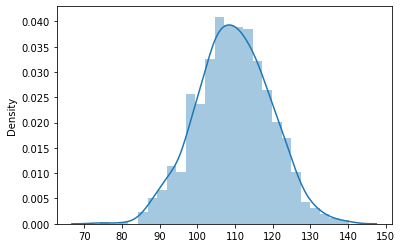

In [18]:
sns.distplot(data)

In [20]:
# 0%, 25%, 50%, 75% and 100%
# [] -> 0 to 1
# 0 - 0% and 1 - 100%
# 0, 0.25, 0.5, 0.75, 1
quant = data.quantile([0, 0.25, 0.5, 0.75,1])

In [23]:
q1 = quant.loc[0.25,]
q3 = quant.loc[0.75,]

In [25]:
iqr = (q3-q1)

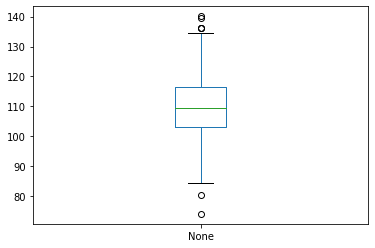

In [27]:
data.plot(kind='box')

In [32]:
lower_cut_off = q1 - 1.5*iqr
upper_Cut_off = q3 + 1.5*iqr

In [36]:
# data.loc[(data <lower_cut_off )] = lower_cut_off
# data.loc[(data > upper_Cut_off)] = upper_Cut_off
#  or
new_data = data.clip(upper = upper_Cut_off,lower=lower_cut_off) 

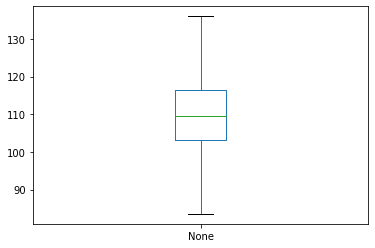

In [37]:
new_data.plot(kind='box')

In [38]:
# Actual way for normally distributed data
LC = data.mean() - 3*data.std()
UC = data.mean() + 3*data.std()
nor_data = data.clip(lower=LC,upper=UC)

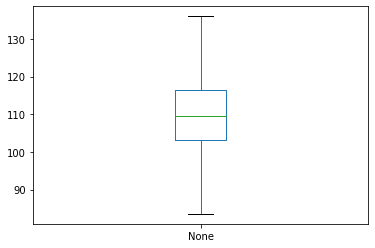

In [39]:
nor_data.plot(kind='box')

#Binning